# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [8]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


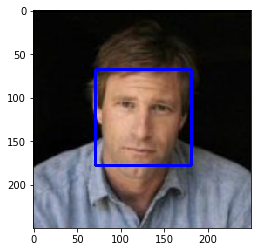

In [12]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [13]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
- True  Detected Human Faces in human_files_short: 96.0%
- False Detected Human Faces in   dog_files_short: 18.0%

I suggested a better human detection that for the same True detected human rate has less false detections when dogs are classified (see the function called human_detector_AD below):
- True  Detected Human Faces in human_files_short: 96.0%
- False Detected Human Faces in   dog_files_short: 9.0%

In [14]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
#
human_face_percentage = np.sum([1 for n in human_files_short if face_detector(n)]) * 100.0 / len(human_files_short)
dog_face_percentage   = np.sum([1 for n in dog_files_short   if face_detector(n)]) * 100.0 / len(dog_files_short)
#
print('True  Detected Human Faces in human_files_short: {0}%'.format(human_face_percentage))
print('False Detected Human Faces in   dog_files_short: {0}%'.format(dog_face_percentage))
#

True  Detected Human Faces in human_files_short: 96.0%
False Detected Human Faces in   dog_files_short: 18.0%


In [15]:
file_name_short = list(human_files_short) + list(dog_files_short)
for img_path in file_name_short:
    img = cv2.imread(img_path)
    print(img.shape)

(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [36]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.
### inspired by https://gilberttanner.com/blog/detectron-2-object-detection-with-pytorch
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
#
# Create config
cfg = get_cfg()
#cfg.merge_from_file("./detectron2_repo/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.merge_from_file("C:/alex/detector2/detectron2-master/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
#"COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml": "137851257/model_final_f6e8b1.pkl",
cfg.MODEL.WEIGHTS = "C:/alex/detector2/model_final_f6e8b1.pkl"
#
# Create predictor
predictor = DefaultPredictor(cfg)
#
import torch
use_cuda = torch.cuda.is_available()
#
# Make prediction
# https://github.com/facebookresearch/detectron2/issues/147
# pred_class = 0 - person, pred_class = 16 - dog 
def human_detector_AD(img_path, pred_class = 0): 
    im = cv2.imread(img_path)
    outputs = predictor(im)
    idxofClass = [i for i, x in enumerate(list(outputs['instances'].pred_classes)) if x == pred_class] # select huuman only
    if len(idxofClass) > 0:
       o = outputs["instances"]
       #classes = o.pred_classes[idxofClass]
       #boxes = o.pred_boxes[idxofClass]
       scores = o.scores[idxofClass]
       if use_cuda:
          scores = scores.cpu()
       #
       confidence = max(scores.numpy())
    else:
       confidence = 0.0
    return confidence
#

In [28]:
# PERSON DETECTOR
for threshold in np.arange(0.9, 1.0, 0.01):
    human_face_percentage = np.sum([1 for n in human_files_short if human_detector_AD(n, 0) >= threshold]) * 100.0 / len(human_files_short)
    dog_face_percentage   = np.sum([1 for n in dog_files_short   if human_detector_AD(n, 0) >= threshold]) * 100.0 / len(dog_files_short)
    #
    print("Threshold: ", threshold)
    print('True  Detected Human Faces in human_files_short: {0}%'.format(human_face_percentage))
    print('False Detected Human Faces in   dog_files_short: {0}%'.format(dog_face_percentage))
    #

Threshold:  0.9
True  Detected Human Faces in human_files_short: 99.0%
False Detected Human Faces in   dog_files_short: 14.0%
Threshold:  0.91
True  Detected Human Faces in human_files_short: 99.0%
False Detected Human Faces in   dog_files_short: 13.0%
Threshold:  0.92
True  Detected Human Faces in human_files_short: 99.0%
False Detected Human Faces in   dog_files_short: 13.0%
Threshold:  0.93
True  Detected Human Faces in human_files_short: 99.0%
False Detected Human Faces in   dog_files_short: 13.0%
Threshold:  0.9400000000000001
True  Detected Human Faces in human_files_short: 99.0%
False Detected Human Faces in   dog_files_short: 13.0%
Threshold:  0.9500000000000001
True  Detected Human Faces in human_files_short: 99.0%
False Detected Human Faces in   dog_files_short: 12.0%
Threshold:  0.9600000000000001
True  Detected Human Faces in human_files_short: 98.0%
False Detected Human Faces in   dog_files_short: 11.0%
Threshold:  0.9700000000000001
True  Detected Human Faces in human_fil

In [48]:
# DOG DETECTOR
#
#Threshold:  0.01, 0.001
#False  Detected Dog in human_files_short: 1.0%
#True   Detected Dog in dog_files_short:   93.0%
for threshold in np.arange(0.1, 0.2, 0.01):
    human_face_percentage = np.sum([1 for n in human_files_short if human_detector_AD(n, 16) >= threshold]) * 100.0 / len(human_files_short)
    dog_face_percentage   = np.sum([1 for n in dog_files_short   if human_detector_AD(n, 16) >= threshold]) * 100.0 / len(dog_files_short)
    #
    print("Threshold: ", threshold)
    print('False  Detected Dog in human_files_short: {0}%'.format(human_face_percentage))
    print('True   Detected Dog in dog_files_short:   {0}%'.format(dog_face_percentage))
    #

Threshold:  0.1
False  Detected Dog in human_files_short: 1.0%
True   Detected Dog in dog_files_short:   93.0%
Threshold:  0.11
False  Detected Dog in human_files_short: 1.0%
True   Detected Dog in dog_files_short:   93.0%
Threshold:  0.12
False  Detected Dog in human_files_short: 1.0%
True   Detected Dog in dog_files_short:   93.0%
Threshold:  0.13
False  Detected Dog in human_files_short: 1.0%
True   Detected Dog in dog_files_short:   93.0%
Threshold:  0.13999999999999999
False  Detected Dog in human_files_short: 1.0%
True   Detected Dog in dog_files_short:   93.0%
Threshold:  0.14999999999999997
False  Detected Dog in human_files_short: 1.0%
True   Detected Dog in dog_files_short:   93.0%
Threshold:  0.15999999999999998
False  Detected Dog in human_files_short: 1.0%
True   Detected Dog in dog_files_short:   93.0%
Threshold:  0.16999999999999998
False  Detected Dog in human_files_short: 1.0%
True   Detected Dog in dog_files_short:   93.0%
Threshold:  0.17999999999999997
False  Detect

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [29]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
print("use_cuda: ", use_cuda)
# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

use_cuda:  True


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [30]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    # inspired by https://gist.github.com/jkarimi91/d393688c4d4cdb9251e3f939f138876e
    # We can do all this preprocessing using a transform pipeline.
    from torch.autograd import Variable
    img = Image.open(img_path)
    min_img_size = 224  # The min size, as noted in the PyTorch pretrained models doc, is 224 px.
    transform_pipeline = transforms.Compose([transforms.Resize(min_img_size),
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                   std=[0.229, 0.224, 0.225])])
    #
    img = transform_pipeline(img)
    # Move tensor to GPU if available
    if use_cuda:
        img = img.cuda()
    #
    # PyTorch pretrained models expect the Tensor dims to be (num input imgs, num color channels, height, width).
    # Currently however, we have (num color channels, height, width); let's fix this by inserting a new axis.
    img = img.unsqueeze(0)  # Insert the new axis at index 0 i.e. in front of the other axes/dims. 
    #
    # Now that we have preprocessed our img, we need to convert it into a 
    # Variable; PyTorch models expect inputs to be Variables. A PyTorch Variable is a  
    # wrapper around a PyTorch Tensor.
    img = Variable(img)
    # Now let's load our model and get a prediciton!
    prediction = VGG16(img)  # Returns a Tensor of shape (batch, num class labels)
    #
    if use_cuda: 
       prediction = prediction.cpu() # Use Tensor.cpu() to copy the tensor to host memory first.
    #
    prediction = prediction.data.numpy().argmax()  # Our prediction will be the index of the class label with the largest value.
    return prediction # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [31]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction = VGG16_predict(img_path)
    #
    if (prediction >= 151) and (prediction <= 268):
        isDog = True
    else:
        isDog = False
    return isDog # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
- False  Detected Dog Faces in human_files_short: 0.0%
- True   Detected Dog Faces in   dog_files_short: 93.0%

In [32]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
#
human_face_percentage = np.sum([1 for n in human_files_short if dog_detector(n)]) * 100.0 / len(human_files_short)
dog_face_percentage   = np.sum([1 for n in dog_files_short   if dog_detector(n)]) * 100.0 / len(dog_files_short)
#
print('False  Detected Dog Faces in human_files_short: {0}%'.format(human_face_percentage))
print('True   Detected Dog Faces in   dog_files_short: {0}%'.format(dog_face_percentage))
#

False  Detected Dog Faces in human_files_short: 0.0%
True   Detected Dog Faces in   dog_files_short: 93.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [57]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
data_dir = 'dogImages'

train_transforms = transforms.Compose([transforms.Resize(size=250),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(10),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std =[0.229, 0.224, 0.225])])

validTest_transforms = transforms.Compose([transforms.Resize(size=250),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])])

train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_transforms)
valid_dataset = datasets.ImageFolder(os.path.join(data_dir, 'valid'), transform=validTest_transforms)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=validTest_transforms)

trainLoader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=0)

validLoader = torch.utils.data.DataLoader(valid_dataset,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=0)

testLoader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=64,
                                          shuffle=False,
                                          num_workers=0)


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [52]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self, n_classes = 133, depth = 32):
        super(Net, self).__init__()
        ### Define layers of a CNN
        ### self.conv1 = nn.Conv2d(  3,  16, kernel_size=3, padding=1)
        ### self.conv2 = nn.Conv2d( 16,  32, kernel_size=3, padding=1)
        ### self.conv3 = nn.Conv2d( 32,  64, kernel_size=3, padding=1)
        ### self.pool = nn.MaxPool2d(2, 2)
        ### self.fc1 = nn.Linear(28 * 28 * 64, 512)
        ### self.fc2 = nn.Linear(512, 133)
        ### self.dropout = nn.Dropout(0.1)
        #
        ############################################################
        #
        scale1 = 1
        scale2 = 2
        scale3 = 4
        #
        # conv Group 1
        self.conv_Set_1_N1 = nn.Conv2d(3,              depth * scale1, 3, stride = 1, padding = 1)
        self.conv_Set_1_N2 = nn.Conv2d(depth * scale1, depth * scale1, 3, stride = 1, padding = 1)
        self.bn_Set_1_N1   = nn.BatchNorm2d(depth * scale1)
        self.bn_Set_1_N2   = nn.BatchNorm2d(depth * scale1)
        # conv Group 2
        self.conv_Set_2_N1 = nn.Conv2d(depth,          depth * scale2, 3, stride = 1, padding = 1)
        self.conv_Set_2_N2 = nn.Conv2d(depth * scale2, depth * scale2, 3, stride = 1, padding = 1)
        self.bn_Set_2_N1   = nn.BatchNorm2d(depth * scale2)
        self.bn_Set_2_N2   = nn.BatchNorm2d(depth * scale2)        
        # conv Group 3
        self.conv_Set_3_N1 = nn.Conv2d(depth * scale2, depth * scale3, 3, stride = 1, padding = 1)
        self.conv_Set_3_N2 = nn.Conv2d(depth * scale3, depth * scale3, 3, stride = 1,padding = 1)
        self.bn_Set_3_N1   = nn.BatchNorm2d(depth * scale3)
        self.bn_Set_3_N2   = nn.BatchNorm2d(depth * scale3)
        #
        self.pool = nn.MaxPool2d(2,2)
        #
        #self.out = nn.Linear(28 * 28 * depth * scale3, n_classes)
        self.fc_out = nn.Linear(depth * scale3, n_classes)   
        #
        nn.init.kaiming_normal_(self.conv_Set_1_N1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv_Set_1_N2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv_Set_2_N1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv_Set_2_N2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv_Set_3_N1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv_Set_3_N2.weight, nonlinearity='relu') 
            
        
    def forward(self, x):
        ### Define forward behavior
        ### x = self.pool(F.relu(self.conv1(x))) # 224/2 = 112 
        ### x = self.pool(F.relu(self.conv2(x))) # 112/2 = 56
        ### x = self.dropout(x)  
        ### x = self.pool(F.relu(self.conv3(x))) #  56/2 = 28
        ### x = x.view(-1, 28 * 28 * 64) # flatten image in order to used by a fully connected layer
        ### x = F.relu(self.fc1(x))
        ### x = self.dropout(x)
        ### x = self.fc2(x)
        #
        ############################################################
        #
        # conv Group 1
        x = F.relu(self.bn_Set_1_N1(self.conv_Set_1_N1(x)))
        x = F.relu(self.bn_Set_1_N2(self.conv_Set_1_N2(x)))
        x = self.pool(x) # 224/2 = 112 
        # conv Group 2
        x = F.relu(self.bn_Set_2_N1(self.conv_Set_2_N1(x)))
        x = F.relu(self.bn_Set_2_N2(self.conv_Set_2_N2(x)))
        x = self.pool(x) # 112/2 = 56
        # conv Group 3
        x = F.relu(self.bn_Set_3_N1(self.conv_Set_3_N1(x)))
        x = F.relu(self.bn_Set_3_N2(self.conv_Set_3_N2(x)))
        x = self.pool(x) #  56/2 = 28
        # First we fuse the height and width dimensions (2 and 3) 
        x = x.view(x.size(0),x.size(1),-1)        
        # And now max global pooling
        x = x.max(2)[0]
        # Output
        x = self.fc_out(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
My model is inspired by VGG model- I use 3 by 3 filter for the convolutional layers and every two convolutional layers followed by pooling layer and in the end I use fully connected layer. Because of memory contrain on GPU memory and training tine I used subset of VGG layers - I use only 6 convolutional layers, 4 max pooling layers and one fully connected layer. I tried a different CNN architecture but it perfroms worse. I use convolutional layers as feature extractors and max pooling layers to add shift invariance to the model.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [53]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=  0.0011) #0.03)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [67]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
from time import time
import pandas as pd
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        print("epoch: ", epoch)
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        start = time()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
   
            # clear gradients of all optimized variables
            optimizer.zero_grad()

            # forwarward pass
            output = model(data)
            
            # calculate batch loss
            loss = criterion(output, target)
            
            # backward pass
            loss.backward()
            
            # perform optimization step
            optimizer.step()
            
            # update training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))    
            #
            if batch_idx % 50 == 0:
               end = time()
               timeAD = end-start
               print('Epoch %d, Batch %d loss: %.6f, Time %.1fs' % (epoch, batch_idx + 1, train_loss,  timeAD))
               start = end
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            #
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        df = pd.DataFrame({"epoch": [epoch], "time": [timeAD], "train_loss": [train_loss], "valid_loss": [valid_loss]})
        df.to_csv("epoch_" + str(epoch) + "_accuracy.csv")
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
           print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model...'.format(valid_loss_min, valid_loss))
           torch.save(model.state_dict(), save_path)
           valid_loss_min = valid_loss           
    # return trained model
    return model

# define loaders_scratch
loaders_scratch = {'train': trainLoader,
                   'valid': validLoader,
                   'test':  testLoader}

# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')
#  test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

epoch:  1
Epoch 1, Batch 1 loss: 7.068487, Time 2.0s
Epoch 1, Batch 51 loss: 5.132473, Time 57.8s
Epoch 1, Batch 101 loss: 4.989016, Time 58.5s
Epoch: 1 	Training Loss: 4.983727 	Validation Loss: 4.752798
Validation loss decreased (inf --> 4.752798). Saving model...
epoch:  2
Epoch 2, Batch 1 loss: 4.723833, Time 0.5s
Epoch 2, Batch 51 loss: 4.715271, Time 58.8s
Epoch 2, Batch 101 loss: 4.691949, Time 58.6s
Epoch: 2 	Training Loss: 4.690682 	Validation Loss: 4.652053
Validation loss decreased (4.752798 --> 4.652053). Saving model...
epoch:  3
Epoch 3, Batch 1 loss: 4.604810, Time 0.5s
Epoch 3, Batch 51 loss: 4.552147, Time 58.6s
Epoch 3, Batch 101 loss: 4.531362, Time 58.6s
Epoch: 3 	Training Loss: 4.528723 	Validation Loss: 4.622684
Validation loss decreased (4.652053 --> 4.622684). Saving model...
epoch:  4
Epoch 4, Batch 1 loss: 4.316566, Time 0.4s
Epoch 4, Batch 51 loss: 4.424477, Time 58.4s
Epoch 4, Batch 101 loss: 4.388114, Time 58.7s
Epoch: 4 	Training Loss: 4.389485 	Validation

Epoch 34, Batch 1 loss: 1.134170, Time 0.5s
Epoch 34, Batch 51 loss: 1.123278, Time 58.7s
Epoch 34, Batch 101 loss: 1.132738, Time 58.6s
Epoch: 34 	Training Loss: 1.129151 	Validation Loss: 2.315051
epoch:  35
Epoch 35, Batch 1 loss: 0.899525, Time 0.7s
Epoch 35, Batch 51 loss: 1.079259, Time 58.5s
Epoch 35, Batch 101 loss: 1.093502, Time 58.4s
Epoch: 35 	Training Loss: 1.093555 	Validation Loss: 2.124367
Validation loss decreased (2.214195 --> 2.124367). Saving model...
epoch:  36
Epoch 36, Batch 1 loss: 1.041941, Time 0.4s
Epoch 36, Batch 51 loss: 1.066239, Time 58.5s
Epoch 36, Batch 101 loss: 1.050123, Time 58.2s
Epoch: 36 	Training Loss: 1.057101 	Validation Loss: 2.483678
epoch:  37
Epoch 37, Batch 1 loss: 1.295803, Time 0.4s
Epoch 37, Batch 51 loss: 1.011032, Time 58.6s
Epoch 37, Batch 101 loss: 1.022914, Time 58.4s
Epoch: 37 	Training Loss: 1.024320 	Validation Loss: 2.263089
epoch:  38
Epoch 38, Batch 1 loss: 1.022731, Time 0.4s
Epoch 38, Batch 51 loss: 0.983253, Time 58.3s
Epo

Epoch 72, Batch 101 loss: 0.335036, Time 58.6s
Epoch: 72 	Training Loss: 0.336208 	Validation Loss: 2.536568
epoch:  73
Epoch 73, Batch 1 loss: 0.207947, Time 0.5s
Epoch 73, Batch 51 loss: 0.334855, Time 58.5s
Epoch 73, Batch 101 loss: 0.319567, Time 58.5s
Epoch: 73 	Training Loss: 0.317866 	Validation Loss: 2.538378
epoch:  74
Epoch 74, Batch 1 loss: 0.381587, Time 0.4s
Epoch 74, Batch 51 loss: 0.309521, Time 58.4s
Epoch 74, Batch 101 loss: 0.298006, Time 58.4s
Epoch: 74 	Training Loss: 0.295695 	Validation Loss: 2.421778
epoch:  75
Epoch 75, Batch 1 loss: 0.226329, Time 0.6s
Epoch 75, Batch 51 loss: 0.265085, Time 58.4s
Epoch 75, Batch 101 loss: 0.276802, Time 58.6s
Epoch: 75 	Training Loss: 0.278679 	Validation Loss: 2.447450
epoch:  76
Epoch 76, Batch 1 loss: 0.173500, Time 0.4s
Epoch 76, Batch 51 loss: 0.246761, Time 58.3s
Epoch 76, Batch 101 loss: 0.269957, Time 58.5s
Epoch: 76 	Training Loss: 0.269073 	Validation Loss: 2.426606
epoch:  77
Epoch 77, Batch 1 loss: 0.194616, Time 0

<All keys matched successfully>

In [68]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

GeForce GTX 1080 Ti
Memory Usage:
Allocated: 0.8 GB
Cached:    6.0 GB


In [69]:
if use_cuda:
   torch.cuda.empty_cache()

In [70]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

GeForce GTX 1080 Ti
Memory Usage:
Allocated: 0.8 GB
Cached:    1.3 GB


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [251]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        #
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        #
        #aad = data.cpu().size()
        #print("Tensor size: ", aad)
        #print("output: ", output.cpu().size())
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
# load the model that got the best validation accuracy
dev = "cpu"
model_scratch_cpu = model_scratch.to(dev)   #does not have much memory on GPU
test(loaders_scratch, model_scratch_cpu, criterion_scratch, use_cuda = False) 

Test Loss: 2.149894


Test Accuracy: 43% (362/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [72]:
## TODO: Specify data loaders
loaders_transfer = {'train': trainLoader,
                    'valid': validLoader,
                    'test':  testLoader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [246]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
n_classes = 133
model_transfer = models.resnet50(pretrained=True)
# Freezing all parameters
for param in model_transfer.parameters():
    param.requires_grad = False
#
# Replacing the last layer (by default it will have requires_grad == True)
model_transfer.fc = nn.Linear(model_transfer.fc.in_features,n_classes)
# Initialize the weights of the new layer
#######nn.init.kaiming_normal_(model_transfer.fc.weight, nonlinearity='relu')
#
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
Resnet is a interesting CNN that has residual connections that allow it to be deeper than previous architectures and provide very promising results for different datasets. We use pre-trained Resnet as feature extrator. For transfer learning, I replace the final linear layer. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [247]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.parameters(),3e-4) 

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [248]:
# train the model
n_epochs = 100
model_transfer =  train(n_epochs, loaders_transfer, model_transfer, 
                        optimizer_transfer, criterion_transfer, 
                        use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

epoch:  1
Epoch 1, Batch 1 loss: 4.958415, Time 0.4s
Epoch 1, Batch 51 loss: 4.239339, Time 25.1s
Epoch 1, Batch 101 loss: 3.558372, Time 24.3s
Epoch: 1 	Training Loss: 3.515169 	Validation Loss: 2.203759
Validation loss decreased (inf --> 2.203759). Saving model...
epoch:  2
Epoch 2, Batch 1 loss: 2.069845, Time 0.6s
Epoch 2, Batch 51 loss: 1.898240, Time 24.1s
Epoch 2, Batch 101 loss: 1.670875, Time 25.6s
Epoch: 2 	Training Loss: 1.660126 	Validation Loss: 1.232461
Validation loss decreased (2.203759 --> 1.232461). Saving model...
epoch:  3
Epoch 3, Batch 1 loss: 1.323029, Time 0.4s
Epoch 3, Batch 51 loss: 1.138325, Time 24.9s
Epoch 3, Batch 101 loss: 1.054424, Time 24.9s
Epoch: 3 	Training Loss: 1.047139 	Validation Loss: 0.898189
Validation loss decreased (1.232461 --> 0.898189). Saving model...
epoch:  4
Epoch 4, Batch 1 loss: 0.738807, Time 0.7s
Epoch 4, Batch 51 loss: 0.837661, Time 24.7s
Epoch 4, Batch 101 loss: 0.789979, Time 25.1s
Epoch: 4 	Training Loss: 0.784977 	Validation

Epoch 34, Batch 51 loss: 0.112934, Time 24.9s
Epoch 34, Batch 101 loss: 0.112363, Time 26.1s
Epoch: 34 	Training Loss: 0.111802 	Validation Loss: 0.379302
epoch:  35
Epoch 35, Batch 1 loss: 0.095302, Time 0.5s
Epoch 35, Batch 51 loss: 0.102818, Time 25.7s
Epoch 35, Batch 101 loss: 0.109335, Time 25.5s
Epoch: 35 	Training Loss: 0.110876 	Validation Loss: 0.374471
epoch:  36
Epoch 36, Batch 1 loss: 0.129652, Time 0.6s
Epoch 36, Batch 51 loss: 0.103898, Time 25.9s
Epoch 36, Batch 101 loss: 0.105144, Time 24.3s
Epoch: 36 	Training Loss: 0.105663 	Validation Loss: 0.356041
epoch:  37
Epoch 37, Batch 1 loss: 0.118342, Time 0.4s
Epoch 37, Batch 51 loss: 0.101755, Time 25.1s
Epoch 37, Batch 101 loss: 0.102534, Time 26.2s
Epoch: 37 	Training Loss: 0.102784 	Validation Loss: 0.378830
epoch:  38
Epoch 38, Batch 1 loss: 0.056835, Time 0.4s
Epoch 38, Batch 51 loss: 0.098762, Time 25.0s
Epoch 38, Batch 101 loss: 0.099966, Time 25.4s
Epoch: 38 	Training Loss: 0.100279 	Validation Loss: 0.405189
epoch

Epoch 73, Batch 1 loss: 0.039533, Time 0.5s
Epoch 73, Batch 51 loss: 0.044028, Time 24.9s
Epoch 73, Batch 101 loss: 0.045649, Time 25.3s
Epoch: 73 	Training Loss: 0.046000 	Validation Loss: 0.366152
epoch:  74
Epoch 74, Batch 1 loss: 0.033560, Time 0.6s
Epoch 74, Batch 51 loss: 0.044267, Time 25.3s
Epoch 74, Batch 101 loss: 0.047366, Time 25.2s
Epoch: 74 	Training Loss: 0.048915 	Validation Loss: 0.360359
epoch:  75
Epoch 75, Batch 1 loss: 0.046040, Time 0.5s
Epoch 75, Batch 51 loss: 0.046247, Time 25.2s
Epoch 75, Batch 101 loss: 0.046658, Time 25.0s
Epoch: 75 	Training Loss: 0.047214 	Validation Loss: 0.349428
epoch:  76
Epoch 76, Batch 1 loss: 0.025365, Time 0.5s
Epoch 76, Batch 51 loss: 0.042301, Time 25.4s
Epoch 76, Batch 101 loss: 0.044077, Time 24.9s
Epoch: 76 	Training Loss: 0.044131 	Validation Loss: 0.346227
epoch:  77
Epoch 77, Batch 1 loss: 0.052359, Time 0.4s
Epoch 77, Batch 51 loss: 0.045003, Time 25.3s
Epoch 77, Batch 101 loss: 0.043900, Time 25.3s
Epoch: 77 	Training Los

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [252]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)
# below accuracy when we USE nn.init.kaiming_normal_
# Test Loss: 0.409725
# Test Accuracy: 88% (739/836)
## below accuracy when we DO NOT USE nn.init.kaiming_normal_
#Test Loss: 0.406121
#Test Accuracy: 88% (736/836)

Test Loss: 0.406121


Test Accuracy: 88% (736/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

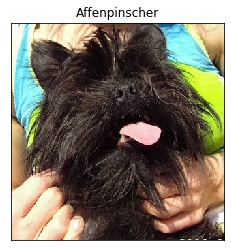

label_index:  0 , dog breed:  Affenpinscher
Prediction probs:  [9.9255651e-01 5.7739229e-04 3.0953897e-06 1.7222081e-06 7.6879987e-09
 2.8205649e-08 8.3416896e-10 3.4622136e-07 4.6790902e-08 2.4555979e-08
 7.0105708e-09 2.0518735e-08 9.0270996e-06 1.4233837e-07 3.3804890e-09
 1.1905156e-08 2.5538624e-05 1.0426471e-08 1.4957809e-08 1.6703765e-09
 8.8561347e-07 2.4343002e-08 1.9039087e-08 2.5983866e-08 4.7141718e-11
 5.6498415e-05 6.9037647e-09 1.5851288e-09 3.1422601e-07 2.4973801e-07
 5.1325785e-08 2.5796746e-07 1.7522811e-04 2.1155127e-07 4.4439761e-07
 7.2901649e-04 1.9149912e-08 7.3404990e-06 2.8358688e-08 1.3871329e-09
 5.4013009e-07 3.7462348e-03 3.2514498e-07 3.1242255e-08 1.1412971e-08
 1.4519399e-06 1.1413994e-08 1.7680019e-07 6.0883263e-04 1.0875886e-08
 3.0284136e-07 1.7319645e-09 5.2457153e-07 4.7321760e-09 6.7411003e-07
 6.0786606e-06 8.0243062e-08 1.5319148e-07 1.7333400e-08 2.9295313e-07
 5.6237290e-08 1.1896916e-08 3.3351029e-08 1.8402404e-06 1.1890422e-09
 1.3475362e-07

In [189]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
#
from PIL import Image
from torch.autograd import Variable
#
# list of class names by index, i.e. a name can be accessed like class_names[0]
data_transfer = loaders_transfer
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].dataset.classes]
#
def show_image_from_path(img_path, title = None):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    if title is not None:
        plt.gca().set_title(title)
    plt.show()
#
def predict_breed_transfer(img_path, model_transfer):
    # Handle image transforms    
    transform = transforms.Compose([transforms.Resize(size=250),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])])
    #
    # Load image and run through transform      
    image = transform(Image.open(img_path))
    # Add dimension to tensor for number of images
    image = image.unsqueeze(0)
    # Prediction placeholder
    # Depending on whether cuda is being used, make sure the passed tensor
    # is being moved between the cpu and GPU pre/post calculation.
    if use_cuda:
       image = Variable(image).cuda()
    else:
       image = Variable(image)
    #
    prediction = model_transfer.forward(image)
    #
    if use_cuda:
       prediction = prediction.to("cpu")
    #
    # To access the index of the highest predicted class value, we access
    # the data of the prediction and find the index of it's highest propbablity
    #
    #return class_names[prediction.data.numpy().argmax()]
    output     = torch.argmax(prediction).to("cpu").item()
    probs      = F.softmax(prediction, dim = 1).to("cpu").data.numpy()
    #
    return output, probs[0]
#
test_image = dog_files_short[0]
label_index, probs = predict_breed_transfer(test_image, model_transfer)
show_image_from_path(test_image, title = class_names[label_index])
#
print("label_index: ", label_index, ", dog breed: ", class_names[label_index])
print("Prediction probs: ", probs)
#

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [231]:
#
def get_random_path_given_breed(breed):
    breed_files = [{"breed": path.split(".")[1].split("\\")[0].replace("_", " "), "path" : path} for path in dog_files]
    #
    breed_files_df = pd.DataFrame(breed_files)
    #
    df = breed_files_df[breed_files_df["breed"] == breed].copy()
    df = df.sample(n=2, replace = False)
    path1 = df["path"].values[0]
    path2 = df["path"].values[1]
    #
    return path1, path2
#

In [237]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
#
def show_images_with_info(img_path, title_picture, title_pie, resemblance_breeds, resemblance_probs):
    # Read the image
    breed      = resemblance_breeds[0]
    confidence = resemblance_probs[0]
    print("With confidence ", np.round(confidence * 100.0, 1), " dog breed is ", breed)
    #
    path1, path2 = get_random_path_given_breed(breed)
    #
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)  
    # Show the image
    fig, ax = plt.subplots(1,2,figsize=(10,4))  
    #
    ax[0].imshow(img)
    ax[0].set_xticks([])
    ax[0].set_yticks([])   
    ax[0].set_title(title_picture)
    #
    if resemblance_breeds[0] == "Nobody":
       resemblance_probs = [0.0]
    #
    wedges, texts, autotexts = ax[1].pie(resemblance_probs, 
                                             autopct='%1.1f%%', wedgeprops = {'linewidth': 0})
    ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax[1].legend(wedges, resemblance_breeds, title="Likely breeds",
                     loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))    
    ax[1].set_title(title_pie)
    plt.show()
    #
    if resemblance_breeds[0] != "Nobody":
       fig, ax = plt.subplots(1,2,figsize=(10,4))  
       #
       img_path = path1
       print("path1: ", path1)
       img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
       ax[0].imshow(img)
       ax[0].set_xticks([])
       ax[0].set_yticks([])
       ax[0].set_title("First example of " + breed)
       #
       img_path = path2
       print("path2: ", path2)
       img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
       ax[1].imshow(img)
       ax[1].set_xticks([])
       ax[1].set_yticks([])
       ax[1].set_title("Second example of " + breed)
       #
       plt.show()    
#    
def probability_processing(probs, n = 3):
    #
    threshold = 1/len(class_names) # equal probabilities 
    #
    df = pd.DataFrame({"breed": class_names, "confidence": probs})
    df = df.sort_values(by = "confidence", ascending = False).head(n)
    #
    # Let's discard unlikely breeds
    df = df[df["confidence"] > threshold].copy()
    #
    resemblance_breeds = list(df["breed"     ].values)
    resemblance_probs  = list(df["confidence"].values)
    #    
    if len(df) > 0:
       if   (len(df) > 1) or ((len(df) == 1) and (resemblance_probs[0] < 0.99)):
            resemblance_breeds = resemblance_breeds + ["Other"]
            resemblance_probs  = resemblance_probs  + [1 - sum(resemblance_probs)]
       elif (len(df) == 1) and (resemblance_probs[0] >= 0.99):
            # If no other breed is predicted with at least 1% let's round up the confidence to 100% 
            resemblance_probs = [1.0]
    else: #uniformly classified - equal probabilities 
          resemblance_probs  = [threshold]
          resemblance_breeds = ["Nobody"]
    # 
    #resemblance_probs  = [threshold]  # I use this line for testing
    #resemblance_breeds = ["Nobody" ]  # I use this line for testing
    return resemblance_breeds, resemblance_probs
#
def run_app(img_path, model_transfer):
    ## handle cases for a human face, dog, and neither 
    # Check if a dog is detected
    dog_detected = dog_detector(img_path)
    # Check if a human is detected
    threshold = 0.98
    human_detected = human_detector_AD(img_path, 0) >= threshold
    # Get the predicted breed(s)
    pred, probs = predict_breed_transfer(img_path, model_transfer)
    # Replace low probabilities classes with "other"
    resemblance_breeds, resemblance_probs = probability_processing(probs)
    # Decide on titles and such
    confidence = resemblance_probs[0]
    confidence = np.round(confidence*100, 1)
    #
    if dog_detected:
        title = f"Dog looks like {resemblance_breeds[0]}!" + "\nConfidence is " + str(confidence) + "%"
        if len(resemblance_breeds) == 1:
           pie_title = "A purebred!"
        else:
           pie_title = "Such a mix we've got here..."
    elif human_detected:
        title     = f"Person looks like a {resemblance_breeds[0]}!" + "\nConfidence is " + str(confidence) + "%"
        pie_title = "Person looka like those dogs:"               
    else:
        title     = "Error: neither dog or person is detected in the image..."
        pie_title = None
        
    # Show everything
    #
    show_images_with_info(img_path, title, pie_title, resemblance_breeds, resemblance_probs)   


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
Output of the dog breed classification is surprisenly good. But it is a bit unclear why some people classified as a certain dog breed with high confidence (>60%).
- Dataset is unbalance: Norwegian buhund has 26 training examples but Alaskan malamute - 77 examples. We can use upper sampling to make balanced training dataset;
- We can add one more fully connected layer to model_transfer model and play with different number of neurons in this layer;
- We can use a different pre-trained model;
- We can perform stacking of different pre-trained models.

With confidence  17.0  dog breed is  Lowchen


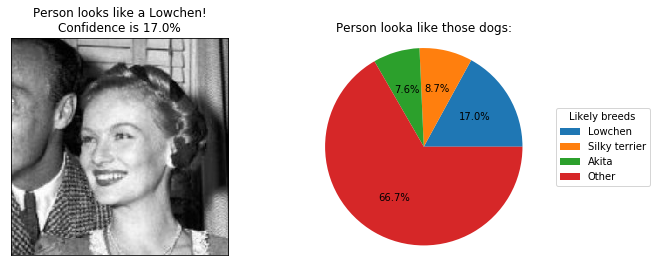

path1:  dogImages\train\100.Lowchen\Lowchen_06705.jpg
path2:  dogImages\train\100.Lowchen\Lowchen_06675.jpg


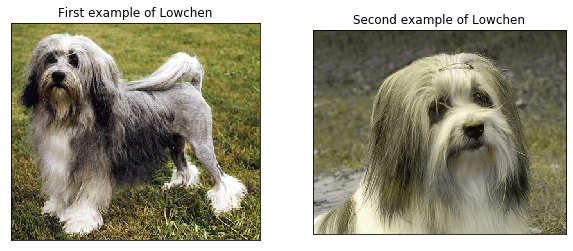

With confidence  21.6  dog breed is  Irish wolfhound


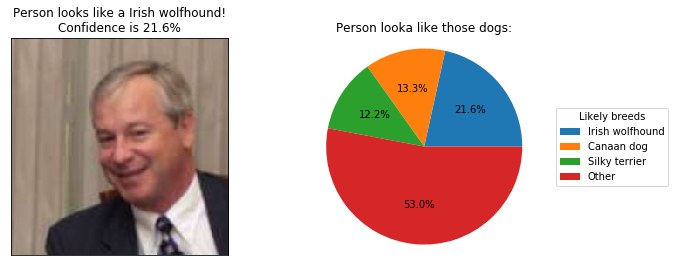

path1:  dogImages\train\089.Irish_wolfhound\Irish_wolfhound_06085.jpg
path2:  dogImages\train\089.Irish_wolfhound\Irish_wolfhound_06062.jpg


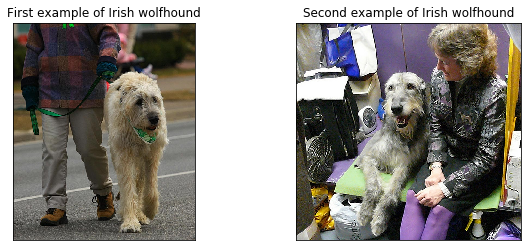

With confidence  12.7  dog breed is  Norfolk terrier


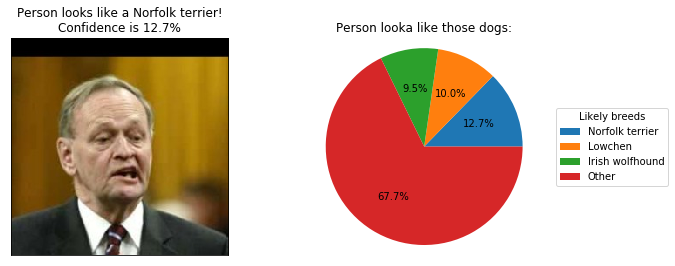

path1:  dogImages\valid\107.Norfolk_terrier\Norfolk_terrier_07087.jpg
path2:  dogImages\train\107.Norfolk_terrier\Norfolk_terrier_07080.jpg


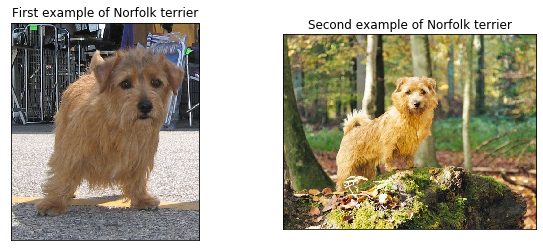

With confidence  60.8  dog breed is  Lowchen


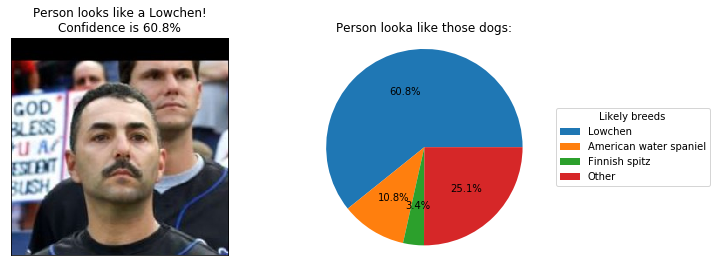

path1:  dogImages\train\100.Lowchen\Lowchen_06673.jpg
path2:  dogImages\train\100.Lowchen\Lowchen_06692.jpg


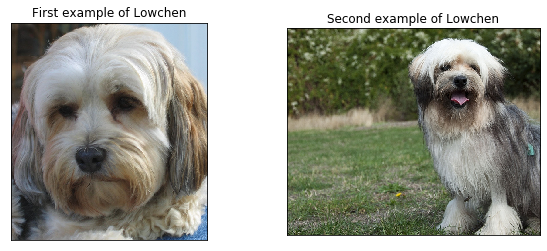

With confidence  24.7  dog breed is  Akita


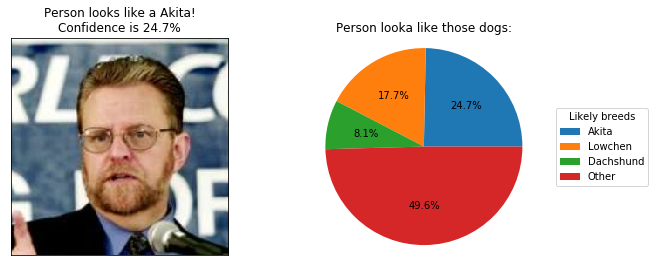

path1:  dogImages\train\004.Akita\Akita_00268.jpg
path2:  dogImages\train\004.Akita\Akita_00285.jpg


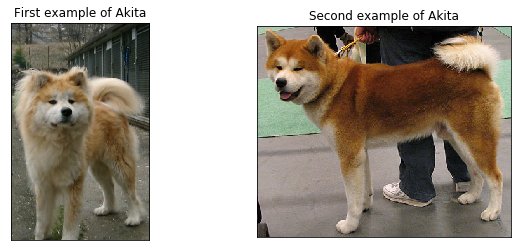

With confidence  82.8  dog breed is  American staffordshire terrier


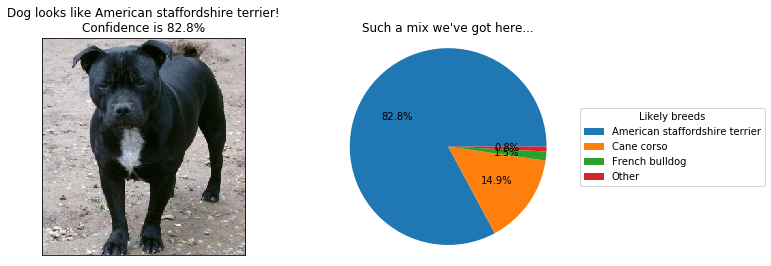

path1:  dogImages\train\008.American_staffordshire_terrier\American_staffordshire_terrier_00612.jpg
path2:  dogImages\test\008.American_staffordshire_terrier\American_staffordshire_terrier_00567.jpg


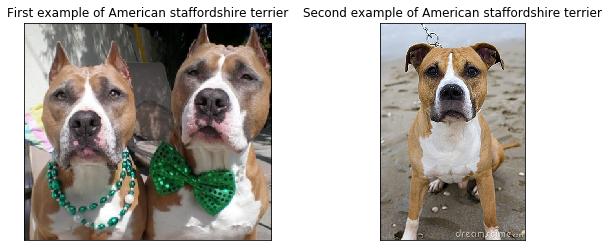

With confidence  100.0  dog breed is  Briard


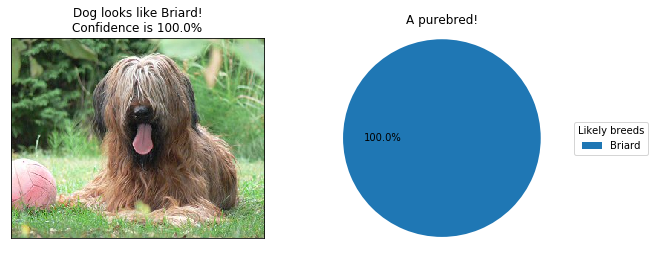

path1:  dogImages\train\036.Briard\Briard_02579.jpg
path2:  dogImages\train\036.Briard\Briard_02510.jpg


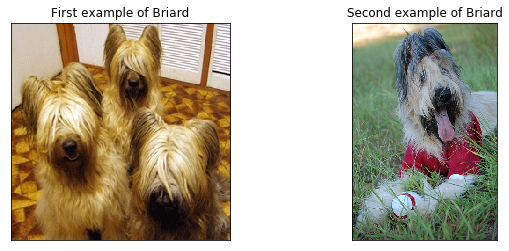

With confidence  80.5  dog breed is  Pomeranian


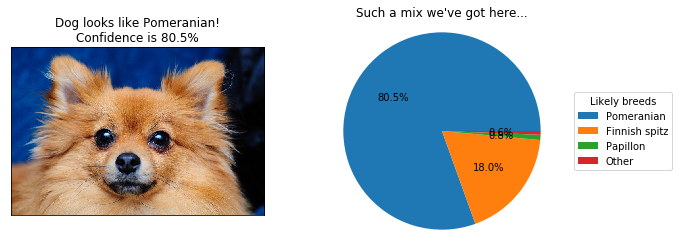

path1:  dogImages\valid\123.Pomeranian\Pomeranian_07866.jpg
path2:  dogImages\test\123.Pomeranian\Pomeranian_07861.jpg


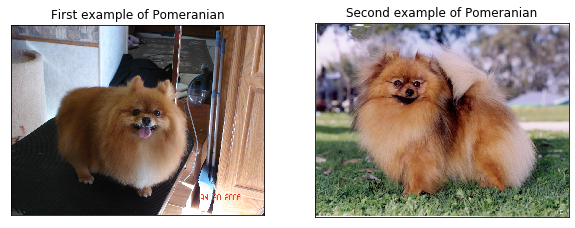

With confidence  100.0  dog breed is  Gordon setter


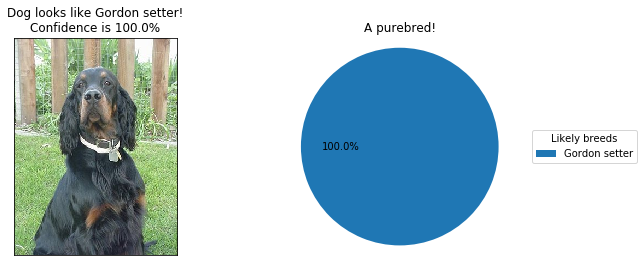

path1:  dogImages\train\077.Gordon_setter\Gordon_setter_05297.jpg
path2:  dogImages\valid\077.Gordon_setter\Gordon_setter_05271.jpg


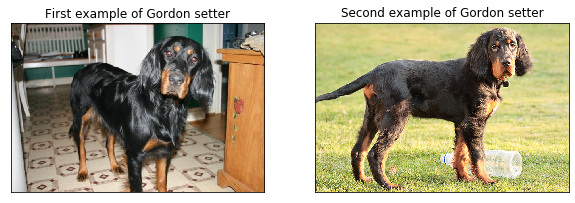

With confidence  96.3  dog breed is  Glen of imaal terrier


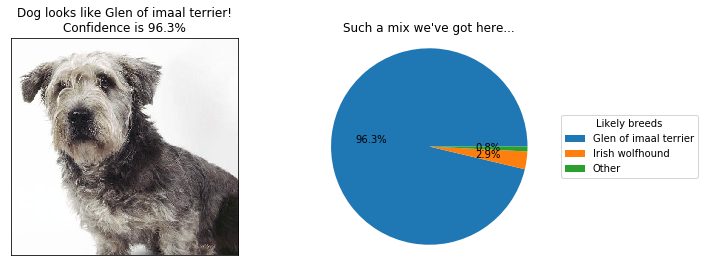

path1:  dogImages\valid\075.Glen_of_imaal_terrier\Glen_of_imaal_terrier_05152.jpg
path2:  dogImages\train\075.Glen_of_imaal_terrier\Glen_of_imaal_terrier_05167.jpg


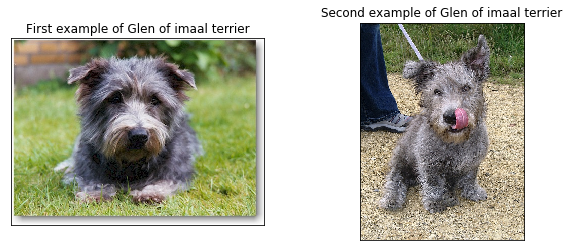

In [238]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
import random
sample_human_files = random.sample(list(human_files), 5)
sample_dog_files   = random.sample(list(dog_files),   5)
#
for file in np.hstack((sample_human_files, sample_dog_files)):
    run_app(file, model_transfer)

In [239]:
import os

In [242]:
path = "dogImages/train"
sub_paths = os.listdir(path)
final = []
for sub_path in sub_paths:
    full_path = os.path.join(path, sub_path)
    names = os.listdir(full_path)
    #print("sub path: ", sub_path, ", number of files: ", len(names))
    elem = {"breed": sub_path, "number": len(names)}
    final.append(elem)
final_df = pd.DataFrame(final)
final_df.sort_values(by = "number", inplace = True)
final_df

breed  number
107    108.Norwegian_buhund      26
131      132.Xoloitzcuintli      26
120               121.Plott      28
101  102.Manchester_terrier      29
132   133.Yorkshire_terrier      30
..                      ...     ...
13              014.Basenji      69
56            057.Dalmatian      71
14         015.Basset_hound      73
28        029.Border_collie      74
4      005.Alaskan_malamute      77

[133 rows x 2 columns]